<a href="https://colab.research.google.com/github/dsanroman96/Machine-Learning-Projects/blob/main/PoesIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexión a Drive e Importación de librerias

Para empezar vamos conectarnos a nuestra cuenta de Google Drive, de donde sacaremos y donde guardaremos todos los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Despues Importamos las librerias que utilizaremos más adelante

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import os

# Preprocesamiento de Datos

Una vez conectados al Drive descargaremos las poesias con las que entrenaremos al modelo. 

In [ ]:
text  = open("/content/drive/MyDrive/PoesIA/dataset/poemas1.txt").read()

print('Número Total de Caracters:', len(text))

Número Total de Caracters: 4895777


In [ ]:
print(text[:250])

En el parque confuso
Que con lánguidas brisas el cielo sahúma,
El ciprés, como un huso,
Devana un ovillo de de bruma.
El telar de la luna tiende en plata su urdimbre;
Abandona la rada un lúgubre corsario,
Y después suena un timbre
En el vecindario.




In [ ]:
abcdary = ['\n', ' ', '!', '#', ',', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¿', 'Á', 'É', 'Í', 'Ñ', 'Ó', 'Ú', 'á', 'é', 'í', 'ñ', 'ó', 'ú', 'ü', '…']
print(abcdary)
print(len(abcdary))

['\n', ' ', '!', '#', ',', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¿', 'Á', 'É', 'Í', 'Ñ', 'Ó', 'Ú', 'á', 'é', 'í', 'ñ', 'ó', 'ú', 'ü', '…']
77


# Procesamiento del Texto

### Vectorización las Poesias

Una paso indispensable es hacer que la Red Neuronal sea capaz de entender los caracteres que más adelante tendrá que generar, y para ello tendremos que "traducir" los caracters a su idioma, es decir numeros.

Para hacer esto crearemos un codificador con `preprocessing.StringLookup`, una capa que codifica los caracteres utilizando como representación númerica su posición en la lista de nuestro abecedario.

In [ ]:
encoder = preprocessing.StringLookup(vocabulary=list(abcdary), mask_token=None)

Una vez la Red Neuronal haya generado la poesia, está estará representada en cifras númericas que tendremos que decodificar.

Para ello repetiremos el proceso anterior, solo que a la inversa, crearemos un decodificador. 

Para la creación del decodificador no utilizaremos el abecedario original, utilizaremos el generado por el codificador.

In [ ]:
decoder = preprocessing.StringLookup(vocabulary=encoder.get_vocabulary(), invert=True, mask_token=None)

def text_decoder(ids):
  return tf.strings.reduce_join(decoder(ids), axis=-1).numpy().decode('utf-8')

### Generación de Sequencias

Para nuestro modelo, necesitamos formar una secuencia de una longitud determinada, que llamamos ventana (window), en la que el carácter a predecir (target)  será el carácter situado junto a la ventana. Cada secuencia estará formada por los caracteres contenidos en la ventana. Para formar una secuencia, la ventana se desplaza un carácter a la derecha cada vez. El carácter a predecir es siempre el que está después de la ventana.


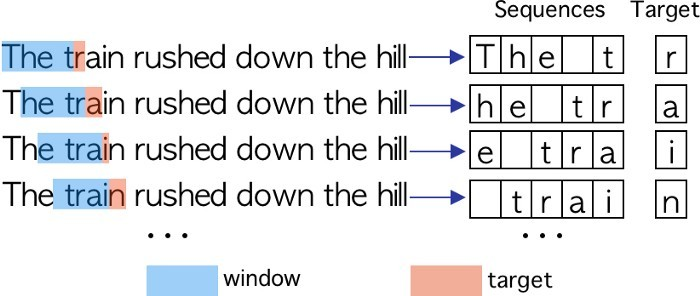

En este caso, el tamaño de la ventana es 4, lo que significa que contendrá 4 caracteres. El objetivo es el primer carácter a la derecha de la ventana

Hasta ahora, hemos visto cómo generar secuencias de caracteres de forma sencilla. Ahora necesitamos convertir cada carácter a su propio formato numérico, por lo que utilizaremos el codificador generado en la fase de preprocesamiento. 


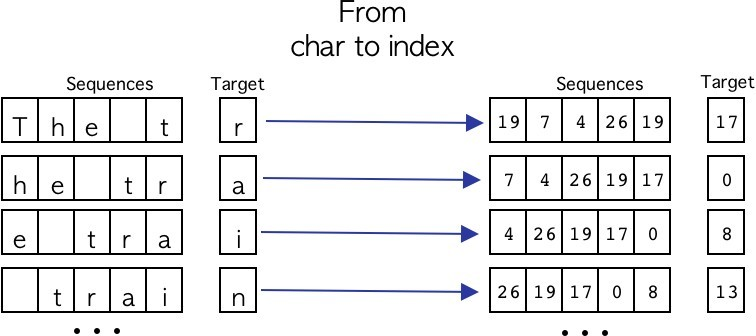

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

all_ids = encoder(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

seq_length = 50
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

dataset = sequences.map(split_input_target)

for input_example, target_example in dataset.take(1):
    print("Input :", text_decoder(input_example))
    print()
    print("Target:", text_decoder(target_example))
    print()
    print("Input:", input_example.numpy())
    print()
    print("Target:", target_example.numpy())


Input : En el parque confuso
Que con lánguidas brisas el c

Target: n el parque confuso
Que con lánguidas brisas el ci

Input: [14 49  2 40 47  2 51 36 53 52 56 40  2 38 50 49 41 56 54 50  1 26 56 40
  2 38 50 49  2 47 70 49 42 56 44 39 36 54  2 37 53 44 54 36 54  2 40 47
  2 38]

Target: [49  2 40 47  2 51 36 53 52 56 40  2 38 50 49 41 56 54 50  1 26 56 40  2
 38 50 49  2 47 70 49 42 56 44 39 36 54  2 37 53 44 54 36 54  2 40 47  2
 38 44]


### Creación de lotes (batches)


Una vez creados los Inputs y los Targets, tendremos que procesarlos para optimizar el proceso de aprendizaje de la Red Neuronal. 

Esto lo haremos "empaquetandolos" en lotes (batches) de 64, y mezclandolos aleatoriamente.

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000000

dataset = (
    dataset.shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset

<PrefetchDataset shapes: ((64, 50), (64, 50)), types: (tf.int64, tf.int64)>

# Redes Neuronales Recurrentes

Para entender el proyecto conviene sentar las bases sobre el funcionamiento de las RNN o Redes Neuronales Recurrentes.

Los RNN se denominan recurrentes porque realizan la misma tarea para cada elemento de una secuencia, y la salida depende de los cálculos anteriores. Otra forma de pensar acerca de los RNN es que tienen una “memoria” que captura información sobre lo que se ha calculado hasta ahora.

En teoría, las RNN pueden utilizar la información en secuencias arbitrariamente largas, pero en la práctica, se limitan a mirar hacia atrás sólo unos pocos pasos, en este proyecto en concreto son 100. 

Para visualizar el funcionamiento se suelen representar de dos formas como una red que “recurre” o “reincide” sobre sí misma, o como una que se sucede en el tiempo.


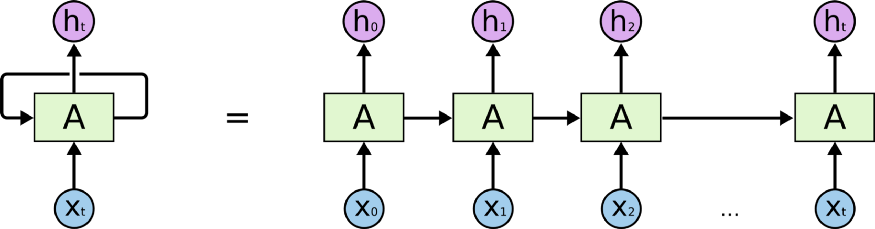

### Capa de Incrustación (Embedding Layer)

La capa de Incrustación de palabras es utilizada para representar palabras y caracteres utilizando una representación vectorial.

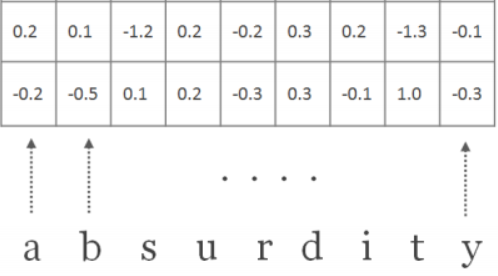

### Capa GRU

La capa GRU (Gated Recurrent Unit) ayuda al modelo a determinar cuánta información pasada (el tamaño de la ventana previamente mencionado) debe transmitirse al futuro. Basicamente concede al modelo de una memoria que le permite recordar los caracteres ya leidos.

In [ ]:
vocab_size = len(abcdary) + 1
embedding_dim = 256
rnn_units = 2048

In [ ]:
class PoesIA_Model(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru1 = tf.keras.layers.GRU(rnn_units,return_sequences=True,return_state=True, dropout=0.2)
    self.gru2 = tf.keras.layers.GRU(rnn_units,return_sequences=True,return_state=True, dropout=0.2)
    self.gru3 = tf.keras.layers.GRU(rnn_units,return_sequences=True,return_state=True, dropout=0.2)
    self.dense = tf.keras.layers.Dense(rnn_units)
    self.dense_output = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      state1 = self.gru1.get_initial_state(x)
      state2 = self.gru2.get_initial_state(x)
      state3 = self.gru3.get_initial_state(x)
    else:
       state1, state2, state3 = states
    x, state1 = self.gru1(x, initial_state=state1, training=training)
    x, state2 = self.gru2(x, initial_state=state2, training=training)
    x, state3 = self.gru3(x, initial_state=state3, training=training)
    x = self.dense(x, training=training)
    x = self.dense_output(x, training=training)

    if return_state:
      return x, [state1, state2, state3]
    else:
      return x

In [ ]:
model = PoesIA_Model(
    vocab_size=len(encoder.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units
)

In [ ]:
model.load_weights('/content/drive/MyDrive/PoesIA/Modelo/')

Para cada caracter, el modelo lo pasa por la Capa de Incrustación, y el resultado lo utilizan las capas GRU como input. Una vez procesada por las GRU la información es pasada a a traves de una capa tradicional para dar como resultado final las probabilidades para cada caracter de ser el siguiente en la secuencia.



![A drawing of the data passing through the model](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/text_generation_training.png?raw=1)

## Entrenamiento de la Red Neuronal

### Función de Perdida, Optimizador y Puntos de Guardado

Como función de perdida utilizaremos `tf.losses.SparseCategoricalCrossentropy` que actuará sobre los resultados de la última capa dandonos las probabilidades individuales que tiene cada caracter de ser el siguiente en la sequencia.

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

Para el optimizador optaremos por Adam, función que ejecuta un descenso de gradiente estocástico. Para optimizar el optimizador, valga la redundancia, configuraremos un descenso del ratio de aprendizaje.

In [ ]:
decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.000001, 
    decay_steps = len(dataset),
    decay_rate = 0.95,
    staircase=True
)

opt = tf.keras.optimizers.Adam(decayed_lr)

In [ ]:
checkpoint_dir = '/content/drive/MyDrive/PoesIA/Modelo/checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,
    save_freq = len(dataset) * 10
)

### Empezar el Entrenamiento

In [ ]:
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
history = model.fit(dataset, epochs=20, callbacks=[checkpoint_callback])

Epoch 1/20
 306/1499 [=====>........................] - ETA: 17:00 - loss: 0.2558 - accuracy: 0.9195

In [ ]:
model.save_weights('/content/drive/MyDrive/PoesIA/Modelo/', save_format='tf')

# Generación de Poesias

Para generar texto con este modelo lo ejecutamos en un bucle, y mantenemos un registro del estado interno de los GRUs a medida que se ejecuta.

![](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/text_generation_sampling.png?raw=1)

Cada vez que se ejecutas el modelo se le pasa un texto y un estado interno. El modelo devuelve una predicción para el siguiente carácter y su nuevo estado. Vuelve a pasar la predicción y el estado para seguir generando texto.


In [ ]:
class TextGenerator(tf.keras.Model):
  def __init__(self, model, decoder, encoder, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.decoder = decoder
    self.encoder = encoder

    skip_ids = self.encoder(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(encoder.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.encoder(input_chars).to_tensor()

    predicted_logits, states = self.model(inputs=input_ids, states=states, return_state=True)
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask

    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.decoder(predicted_ids)

    return predicted_chars, states


In [ ]:
generator = TextGenerator(model, decoder, encoder)

In [ ]:
def write_poetry(generator, line, num_char):
  states = None
  next_char = tf.constant([line])
  result = [next_char]

  for n in range(num_char):
    next_char, states = generator.generate_one_step(next_char, states=states)
    result.append(next_char)
    if next_char == "#":
      break

  result = tf.strings.join(result)
  result = result[0].numpy().decode('utf-8')
  return result

In [ ]:
line = '# Bailar de lejos, no es bailar \nEs como estar bailando solo \n'

poem = write_poetry(generator, line, 1000)
poem = poem.replace('# ', '')
print(poem)

Bailar de lejos, no es bailar 
Es como estar bailando solo 
que mansa que parece 
mirar hacia mí cual mi alma; 
niña, trajos cuyos lunas creadora 
esos brazos que te enfrían.#


In [ ]:
line = '# En un día de estos en que suelo pensar \n'

poem = write_poetry(generator, line, 1000)
poem = poem.replace('# ', '')
print(poem)

En un día de estos en que suelo pensar 
a la própide frente en la yunto, 
hay un gran sol de hermosura es yerra; 
verde de sueños y helechos 
y tres rosas frescas, mojadas rojas 
y el toro de tus plumas rosadas. 

Apuesto entre galanes y gaires
de la hierba en los caminos, y ve
la que salva el amor su hoguera,
lleva la pendiente estrella
de los trinos despojos.

Y en la luna que mi mano toquea
tus varios festales,
y te di lo que di si no está 
para que así duerme ni la planta de sumer 
para llevar a mi pecho este 
la vida en mi mano ardiente 
y tu pie es la más bella 
y volviese a tu alma.#


In [ ]:
line = '# Mi '

poem = write_poetry(generator, line, 1000)
poem = poem.replace('# ', '')
print(poem)

Mi esperanza, en el deseo es más alta,
sencillo aquel mañana, y me pensasce
de lejos cuando la sed aquellos senos.

¡Oh, no somos de nuevo!
Te escribo por tus brazos.
Le moriré a tu hermano, de torno a ti,
con los bosques mojados de los tórtolos,
estrella mitiga mi alma,
donde la madre o tierra, a lo lejos,
pues de tengo la menos completos,
por quien eres Bondea;
paredes la experiencia tiene voces de repente.

El lugar es un noche, tu miseria de manzana,
en mis ojos, seguro que la falta y la triste
